In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
print(cv2.__version__)

4.7.0


### 1) Get coords of each line

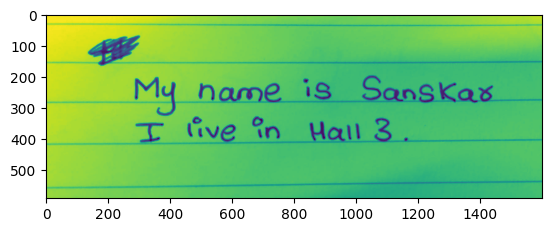

In [15]:
img = cv2.imread("C:\Harsh Rao Dhanyamraju\Projects\AIfinity Hackathon\AutoRegressive-Alliance\Test\MultiLine_OCR_Test2.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

In [16]:
## (2) threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

In [17]:
## (3) minAreaRect on the nozeros
pts = cv2.findNonZero(threshed)
ret = cv2.minAreaRect(pts)

(cx,cy), (w,h), ang = ret
if w>h:
    w,h = h,w
    ang += 90

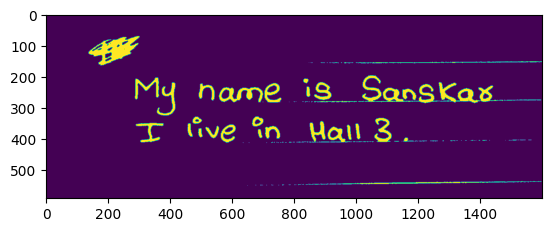

In [18]:
plt.imshow(threshed)

In [19]:
## (5) find and draw the upper and lower boundary of each lines
hist = cv2.reduce(threshed,1, cv2.REDUCE_AVG).reshape(-1)


In [20]:
th = 2
H,W = img.shape[:2]
uppers_y = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers_y = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

threshed = cv2.cvtColor(threshed, cv2.COLOR_GRAY2BGR)
for y in uppers_y:
    cv2.line(threshed, (0,y), (W, y), (255,0,0), 1)

for y in lowers_y:
    cv2.line(threshed, (0,y), (W, y), (0,255,0), 1)

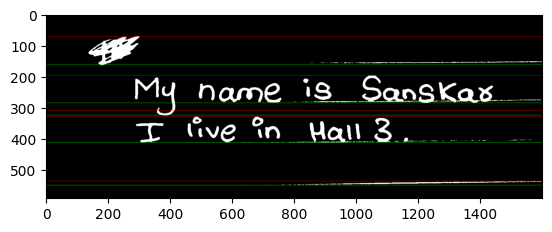

In [21]:
plt.imshow(threshed)

### 2) Seperate each line into seperate files

In [22]:
uppers_y

[72, 197, 309, 329, 536]

In [23]:
lowers_y

[161, 285, 324, 412, 549]

In [24]:
cropped_images = []
i = 0
while(i < len(uppers_y)):
    cropped_img = threshed[uppers_y[i]:lowers_y[i], 0:W]
    cropped_images.append(abs(255-cropped_img))
    i += 1

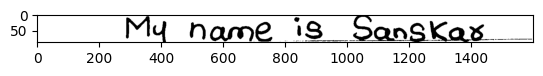

In [25]:
plt.imshow(cropped_images[1])

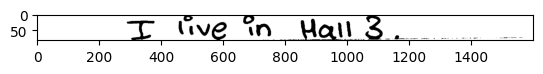

In [26]:
plt.imshow(cropped_images[3])